In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
import scipy


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)


In [2]:
with open('data/pickles/features_29feat_clean.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df['Grad_Rate_Reflected'] = 100 - df['Graduation_Rate_School']

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


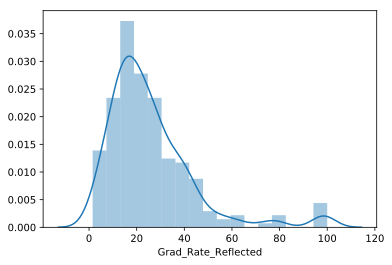

In [4]:
sns.distplot(df['Grad_Rate_Reflected'])

In [5]:
df['log_grad_rate'] = np.log(df['Grad_Rate_Reflected'])

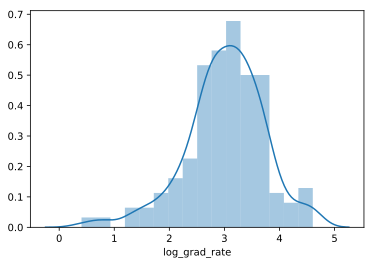

In [6]:
sns.distplot(df['log_grad_rate'])

In [7]:
X = df[[#'Student_Count_Total','Zip_Mean_Income',
         'Fully Accessible','Generally accessible',
         'Graduation_Rate_School',
         'Student_Count_Asian_perc',
         'Student_Count_Asian_Pacific_Islander_perc',
         'Student_Count_Black_perc',
         'Student_Count_English_Learners_perc',
         'Student_Count_Ethnicity_Not_Available_perc',
         'Student_Count_Hawaiian_Pacific_Islander_perc',
         'Student_Count_Hispanic_perc',
         'Student_Count_Low_Income_perc',
         'Student_Count_Multi_perc',
         'Student_Count_Native_American_perc',
         #'Student_Count_Other_Ethnicity_perc',
         'Student_Count_Special_Ed_perc',
         'Student_Count_White_perc',
         'Classroom_Languages_count',
         'Blue',
         #'Brown',
         'Green',
         'Orange',
         'Pink',
         'Purple',
         'Red',
         'Dress_Code_dummie',
         'grades_offered_count',
         'charter',
         'gender_f_bn'
           ]]
y = df['log_grad_rate']

kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

train_r2 = []
val_r2   = []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    train_r2.append(lm.score(X_train, y_train))
    val_r2.append(lm.score(X_val, y_val))

print(train_r2)
print(val_r2)

[0.8718959370083176, 0.874061105447856, 0.8763232529528029, 0.8690579853414337, 0.8747132372180371]
[0.8129109869098847, 0.8044116387232798, 0.7787120795820595, 0.8345994608391738, 0.7955898611077041]


In [9]:
df_topickle = df.drop(columns = ['Graduation_Rate_School','Grad_Rate_Reflected','Student_Count_Total','Zip_Mean_Income',
                        'Student_Count_Other_Ethnicity_perc','Brown'])


In [10]:
df_topickle


Fully Accessible  Generally accessible  Student_Count_Asian_perc  \
0                   0                     1                     0.003   
1                   0                     1                     0.006   
2                   0                     0                     0.000   
3                   0                     0                     0.000   
4                   0                     0                     0.000   
5                   0                     0                     0.000   
6                   0                     1                     0.034   
7                   0                     1                     0.031   
8                   0                     0                     0.000   
9                   0                     0                     0.000   
10                  0                     1                     0.000   
11                  0                     1                     0.000   
..                ...                   ...                       ...   
224                 0                     1                     0.003   
225                 0                     1                     0.003   
226                 0                     1                     0.000   
227                 0                     1                     0.000   
228                 1                     0                     0.179   
229                 1                     0                     0.174   
230                 0                     1                     0.130   
231                 0                     1                     0.143   
232                 0                     1                     0.037   
233                 0                     1                     0.030   
234                 0                     1                     0.039   
235                 0                     1                     0.037   

     Student_Count_Asian_Pacific_Islander_perc  Student_Count_Black_perc  \
0                                    0.000e+00                     0.033   
1                                    0.000e+00                     0.031   
2                                    0.000e+00                     0.032   
3                                    0.000e+00                     0.019   
4                                    0.000e+00                     0.774   
5                                    0.000e+00                     0.777   
6                                    0.000e+00                     0.309   
7                                    0.000e+00                     0.303   
8                                    0.000e+00                     0.737   
9                                    0.000e+00                     0.735   
10                                   0.000e+00                     0.978   
11                                   0.000e+00                     0.960   
..                                         ...                       ...   
224                                  0.000e+00                     0.411   
225                                  0.000e+00                     0.441   
226                                  0.000e+00                     0.401   
227                                  0.000e+00                     0.357   
228                                  0.000e+00                     0.110   
229                                  0.000e+00                     0.108   
230                                  5.359e-04                     0.139   
231                                  1.043e-03                     0.119   
232                                  0.000e+00                     0.092   
233                                  0.000e+00                     0.103   
234                                  0.000e+00                     0.273   
235                                  0.000e+00                     0.288   

     Student_Count_English_Learners_perc  \
0                                  0.190   
1                                  0.201 

In [13]:
with open('data/pickles/log_grad_inflected.pickle', 'wb') as to_write:
    pickle.dump(df_topickle, to_write)